# **Capstone Project AIML Great Learning**

---

**AUTOMATIC TICKET ASSIGNMENT**

An automatic ticketing system guided by powerful AI techniques that can classify incidents to right functional groups can help 
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

### Mount & Imports

In [99]:
# Mounting the drive for the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from bs4 import BeautifulSoup
import unicodedata
import string
import nltk
import re
import spacy
from dateutil import parser

project_path="/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/"
df=pd.read_excel(project_path +'input_data.xlsx')

## PART 1 - <br> Pre-Processing, Data Visualization and EDA

---

* Exploring the given Data files <br>
* Understanding the structure of data <br>
* Missing points in data <br>
* Finding inconsistencies in the data <br>
* Visualizing different patterns  <br>
* Visualizing different text features <br>
* Dealing with missing values <br>
* Text preprocessing  <br>
* Creating word vocabulary from the corpus of report text data <br>
* Creating tokens as required <br>

**View First 5 records of DataSet**

In [101]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


**Information about data.i.e datatypes,number of records,column names**

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Column names in Dataset**

In [103]:
df.keys()

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

**Shape of the Data**

In [104]:
df.shape

(8500, 4)

**Unique Groups**

In [105]:
df["Assignment group"].nunique()

74

**Unique,Top,Freq Records**

In [106]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


**Finding Null,NaN values**

In [107]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [108]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Replacing Null Values**

In [109]:
def ReplaceNanValues(text):
   text.dropna(inplace=True)
   return text

In [110]:
df_copy=df.copy()

In [111]:
ReplaceNanValues(df_copy)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [112]:
df_copy.isnull().sum()
# No null values left

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [113]:
df_copy.shape

(8491, 4)

**Dupes in Dataset**

In [114]:
# Finding the duplicates data.
df_copy=df_copy.astype(str)
duplicateRowsDf_copy=df_copy[df_copy.duplicated()]
print(duplicateRowsDf_copy)
print(duplicateRowsDf_copy.sum())

                                      Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]
Short description    call for ecwtrjnq jp

**Removing Dupes**

In [115]:
# Writing function to remove Dupes
def RemoveDupes(text):
  text.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'],inplace=True)
  return text

In [116]:
RemoveDupes(df_copy)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [117]:
df_copy.duplicated().sum()

0

**Merging Short Description and Description**

In [118]:
# Merging Short Desc and Description
df_copy["Combined Description"] = df_copy["Short description"].astype(str) + ' ' + df_copy["Description"].astype(str)

In [119]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


**Grouping Assignment Group Column**

In [120]:
df_grp=df_copy.groupby(['Assignment group']).size().reset_index(name='counts')

**Top 20 Groups**

In [121]:
df_grp.sort_values(by='counts',ascending=False)[:20]

,Assignment group,counts
0,GRP_0,3926
72,GRP_8,645
17,GRP_24,285
4,GRP_12,257
73,GRP_9,252
12,GRP_2,241
11,GRP_19,215
23,GRP_3,200
56,GRP_6,183
5,GRP_13,145


**Bottom 20 groups**

In [122]:
df_grp.sort_values(by='counts',ascending=False)[-20:]

,Assignment group,counts
41,GRP_46,6
38,GRP_43,5
63,GRP_66,4
26,GRP_32,4
32,GRP_38,3
65,GRP_68,3
60,GRP_63,3
54,GRP_58,3
52,GRP_56,3
53,GRP_57,2


**Groups With Count<50**

In [123]:
df_grp_CountLessThan50 = df_grp[df_grp['counts']<50]

In [124]:
df_grp_CountLessThan50

,Assignment group,counts
1,GRP_1,31
3,GRP_11,30
7,GRP_15,38
13,GRP_20,36
14,GRP_21,28
15,GRP_22,31
16,GRP_23,25
20,GRP_27,18
21,GRP_28,44
24,GRP_30,39


In [125]:
df_grp_CountLessThan50.shape

(50, 2)

**Plotting Group Ticket Assignment freq**

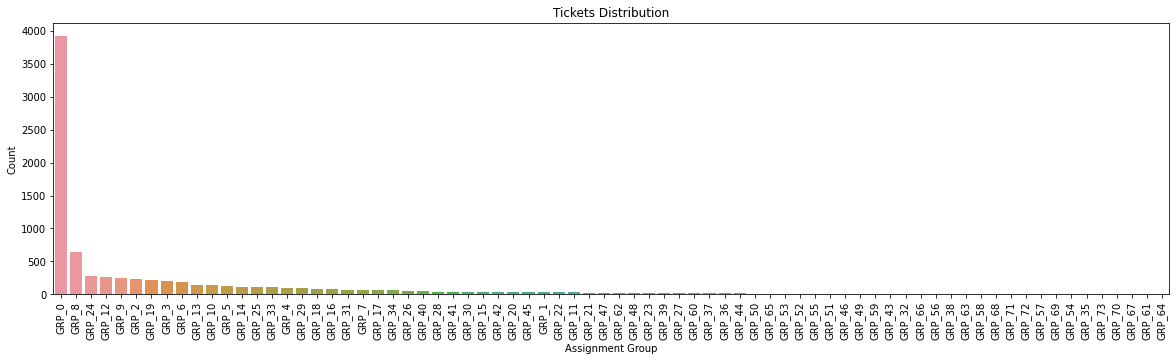

In [126]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df_copy,order = df_copy['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [127]:
df_grp.describe()

,counts
count,74.000000
mean,113.621622
std,459.823990
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3926.000000


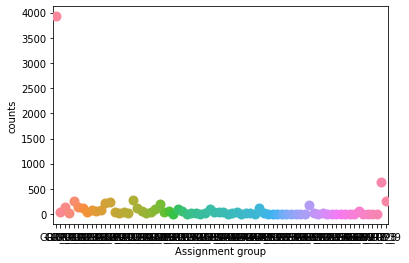

In [128]:
sns.swarmplot(x=df_grp['Assignment group'], y=df_grp['counts'], data=df_grp,size=10)

**Word Count In Data Set**

In [129]:
df_copy['word_counts']=df_copy['Combined Description'].apply(lambda x :len(str(x).split()))

**Char Count**

In [130]:
df_copy['char counts']=df_copy['Combined Description'].apply(lambda x : len(x))

In [131]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25


**Stop Words**

In [132]:
print(STOP_WORDS)

{'until', 'out', 'again', 'ours', 'thus', 'been', 'whereafter', 'hereafter', 'ca', 'into', 'you', 'somehow', 'during', 'them', 'others', 'serious', 'third', 'meanwhile', 'behind', 'hence', 'everything', 'five', 'full', 'forty', 'itself', 'via', 'toward', 'a', 'but', 'get', 'beyond', 'these', 'onto', 'rather', 'eight', 'only', 'anyway', 'how', 'what', 'ourselves', 'elsewhere', 'under', 'due', 'anywhere', 'became', 'thereafter', 'would', 'further', 'become', 'nowhere', 'first', 'which', '’d', 'were', 'all', 'doing', 'below', 'could', 'the', 'unless', 'thereby', 'an', 'since', 'former', "'ve", 'seeming', 'among', 'their', 'twelve', 'namely', 'through', 'of', 'whenever', 'seem', 'himself', 'nothing', 'not', 'such', 'when', 'whose', 'latter', 'it', 'hundred', 'take', 'before', 'show', 'he', 'already', 'part', 'may', 'might', 'while', 'per', 'seems', 'without', 'too', 'here', 'always', '’ve', 'yet', 'yourself', 'both', 'nevertheless', 'much', 'herself', 'whoever', 'had', 'at', 'other', 'used

In [133]:
df_copy['stop_words_len']=df_copy['Combined Description'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))

In [134]:
df_copy.head(5)

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218,12
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202,9
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59,2
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0


In [135]:
df_copy['stop_words']=df_copy['Combined Description'].apply(lambda x : [t for t in x.split() if t in STOP_WORDS])

In [136]:
df_copy.head()

,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,35,218,12,"[the, name, in, and, the, the, to, and, that, ..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,26,202,9,"[my, are, not, in, my, can, please, how, to]"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,16,106,6,"[in, to, i, cannot, on, to]"
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,59,2,"[to, to]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[]


**Text Preprocessing**

In [137]:
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

callers = df_copy['Caller'].unique() 

def data_clean_up(text):
  # Remove html tags
  text=BeautifulSoup(text,'html.parser').get_text()
  # Remove Accented text
  text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

# Removing special chars
  pat=r'[^A-Za-z0-9.,!?/:;\"\'\s]'
  text=re.sub(pat,' ',text)
# Remove punctuations
  text=''.join([t for t in text if t not in string.punctuation])

  text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  text = re.sub(r"received from:",' ',text)
  text = re.sub(r"from:",' ',text)
  text = re.sub(r"to:",' ',text)
  text = re.sub(r"subject:",' ',text)
  text = re.sub(r"sent:",' ',text)
  text = re.sub(r"ic:",' ',text)
  text = re.sub(r"cc:",' ',text)
  text = re.sub(r"bcc:",' ',text)  

# Stemming
  # stemmer=nltk.porter.PorterStemmer()
  # text=' '.join([stemmer.stem(word) for word in text.split()])


# Lemmatization
  # nlp=spacy.load('en',parse=True,tag=True,entity=True)
  # text=nlp(text)
  # text=' '.join([word.lemma_ if word.lemma_ !='-PRON-' else word.text for word in text])

# Remove extra white spaces
  text=re.sub('\s+',' ',text)

# Remove new line characters 
  text = re.sub(r'\n',' ',text)

# Lower case
  text=text.lower()

# Removing HTML tags
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, ' ',text)
# Remove Email Id
  text = re.sub(r'\S*@\S*\s?', '', text)
  
 # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()
  # Remove numbers
  text = re.sub(r'\d+','' ,text)

# Remove hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text) 

# Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()

# Remove unreadable characters  (also extra spaces)
  text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
  for name in callers:
    namelist = [part for part in name.split()]
    for namepart in namelist:
      text = text.replace(namepart,'')

  return text

In [138]:
df_copy['Combined Description'][410]

"access to retired employee's collaboration_platform Myhrt sthry retired as plant manager in usa. i have replaced him. i request access to his collaboration_platform to copy relevant documents before it is being deleted as per e-mail below.\n----------------------------\nfrom: mqjdyizg amhywoqg \nsent: saturday, october 22, 2016 9:00 am\nto:  <rozsyfai.zncajubh@gmail.com>\nsubject: fw: Myhrt sthry's collaboration_platform for business contents will be preserved for 30 days\n\ndanieâ€¦you should follow up on this to see if there are any files you may need.\n\nutejhdyd\n\n\nvice president and general manager\n\nfrom: no-reply@collaboration_platformonline.com [mailto:no-reply@collaboration_platformonline.com] \nsent: saturday, october 22, 2016 8:56 am\nto: mqjdyizg amhywoqg <mqjdyizg.amhywoqg@gmail.com>\nsubject: Myhrt sthry's collaboration_platform for business contents will be preserved for 30 days\n\nMyhrt sthry's account has been deleted from the active directory. their collaboration_

In [139]:
df_copy['Combined Description']= df_copy['Combined Description'].apply(data_clean_up)

In [140]:
df_copy['Combined Description'][410]

'access to retired employees collaboration platform myhrt sthry retired as plant manager in usa i have replaced him i request access to his collaboration platform to copy relevant documents before it is being deleted as per e mail below from   sent am to subject fw myhrt sthrys collaboration platform for business contents will be preserved for days danieayou should follow up on this to see if there are any files you need utejhdyd vice president and general manager from no reply collaboration platformonlinecom mailtono reply collaboration platformonlinecom sent am to   subject myhrt sthrys collaboration platform for business contents will be preserved for days myhrt sthrys account has been deleted from the active directory their collaboration platform for business will be preserved for days youre the temporary owner of all documents saved to their collaboration platform for business if you would like to save content beyond the day retention period you can copy important documents to ano

In [141]:
df_copy['Combined Description'].head()

0    login issue verified user details employee man...
1    outlook received from  gmailcom hello team my ...
2    cant log in to vpn received from  gmailcom hi ...
3    unable to access hr tool page unable to access...
4                              skype error skype error
Name: Combined Description, dtype: object

**Languare Classification**


In [142]:
!pip install langdetect 
from langdetect import detect
df_copy['language'] = df_copy['Combined Description'].apply(detect)

In [143]:
df_copy['language'].nunique()

29

In [144]:
len(df_copy)

8408

In [145]:
df_copy['language'].iloc[20]

'en'

In [146]:
df_copy[['language','Combined Description']]

,language,Combined Description
0,en,login issue verified user details employee man...
1,en,outlook received from gmailcom hello team my ...
2,en,cant log in to vpn received from gmailcom hi ...
3,en,unable to access hr tool page unable to access...
4,no,skype error skype error
...,...,...
8495,en,emails not coming in from zz mail received fro...
8496,en,telephony software issue telephony software issue
8497,en,vip windows password reset for tifpdchb pedxru...
8498,en,machine nao esta funcionando i am unable to ac...


**Combined Description contains 29 languages**

In [147]:
df_copy.groupby(['language']).size().reset_index(name='Language Counts').sort_values(by='Language Counts',ascending=False)

,language,Language Counts
6,en,7028
5,de,379
0,af,274
14,it,136
10,fr,122
18,no,74
25,sv,65
17,nl,56
7,es,53
21,ro,46


**Translating Combined Description column values to English language**

In [148]:
!pip install -q googletrans
from googletrans import Translator

def translateIfRequired(x):
     translator = Translator()
     if translator.detect(x).lang != 'en':
         translatedText = translator.translate(x).text
     else:
         translatedText = x
     return translatedText

In [149]:
Index = df_copy['Combined Description'].index

In [150]:
#  for rowId in Index:
#      df_copy['Combined Description'][rowId] = translateIfRequired(df_copy['Combined Description'][rowId])

**Again run the detection model**

In [151]:
df_copy['language_check'] = df_copy['Combined Description'].apply(detect)

In [152]:
df_copy['language_check'].nunique()

30

**Lemmatization**

In [153]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# sr = stopwords.words('english')
# for i,text in enumerate(df_copy['Combined Description']):
#   df_copy['Combined Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])



df_copy['Combined Description'] = df_copy['Combined Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [154]:
df_copy['Combined Description'][410]

'access to retire employee collaboration platform myhrt sthry retire as plant manager in usa i have replace -PRON- i request access to -PRON- collaboration platform to copy relevant document before -PRON- be be delete as per e mail below from    send be to subject fw myhrt sthrys collaboration platform for business content will be preserve for day danieayou should follow up on this to see if there be any file -PRON- need utejhdyd vice president and general manager from no reply collaboration platformonlinecom mailtono reply collaboration platformonlinecom send be to    subject myhrt sthrys collaboration platform for business content will be preserve for day myhrt sthrys account have be delete from the active directory -PRON- collaboration platform for business will be preserve for day -PRON- be the temporary owner of all document save to -PRON- collaboration platform for business if -PRON- would like to save content beyond the day retention period -PRON- can copy important document to 

In [155]:
df_copy['Combined Description']

0       login issue verify user detail employee manage...
1       outlook receive from   gmailcom hello team -PR...
2       can not log in to vpn receive from   gmailcom ...
3       unable to access hr tool page unable to access...
4                                 skype error skype error
                              ...                        
8495    email not come in from zz mail receive from   ...
8496    telephony software issue telephony software issue
8497    vip windows password reset for tifpdchb pedxru...
8498    machine nao esta funcionando i be unable to ac...
8499    an mehreren pc s lassen sich verschiedene prgr...
Name: Combined Description, Length: 8408, dtype: object

**Saving cleaned dataset to csv for future use**

In [156]:
df_copy.to_pickle('DataCleanedTranslated.pkl')

In [157]:
# Df_Cleaned_Translated_Data=pd.read_pickle('DataCleanedTranslated.pkl')
# #dataAnalysis=dataAnalysis.transpose()
# Df_Cleaned_Translated_Data.head()

In [158]:
df_copy.to_csv(project_path +'/CleanedDatasetTranslated.csv')

In [159]:
import numpy as np
import pandas as pd
df_copy_Refined_Data=pd.read_csv('/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/CleanedDatasetTranslated.csv')
df_copy_Refined_Data.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Combined Description,word_counts,char counts,stop_words_len,stop_words,language,language_check
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,35,218,12,"['the', 'name', 'in', 'and', 'the', 'the', 'to...",en,en
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook receive from gmailcom hello team -PR...,26,202,9,"['my', 'are', 'not', 'in', 'my', 'can', 'pleas...",en,en
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from gmailcom ...,16,106,6,"['in', 'to', 'i', 'cannot', 'on', 'to']",en,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,10,59,2,"['to', 'to']",en,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,25,0,[],no,no


**Merging Combined Description With respect to Groups**

In [160]:
df_copyAnalysis=df_copy_Refined_Data.groupby('Assignment group', as_index=False).agg({'Combined Description' : ' '.join})  


In [161]:
df_copyAnalysis.head()

,Assignment group,Combined Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_1,event criticalhostname companycom the value of...
2,GRP_10,job hr payroll na u fail in job scheduler at r...
3,GRP_11,engineering tool drawing original in pdf forma...
4,GRP_12,amssm c labelsys amssm ef on server be over sp...


In [162]:
df_copyAnalysis.loc[0,'Combined Description']

'login issue verify user detail employee manager name check the user name in ad and reset the password advise the user to login and check caller confirm that -PRON- be able to login issue resolve outlook receive from   gmailcom hello team -PRON- meetingsskype meeting etc be not appear in -PRON- outlook calendar can somebody please advise how to correct this kind can not log in to vpn receive from   gmailcom hi i can not log on to vpn best unable to access hr tool page unable to access hr tool page skype error skype error unable to log in to engineering tool and skype unable to log in to engineering tool and skype ticket no employment status new non employee enter user name ticket no employment status new non employee enter user name unable to disable add in on outlook unable to disable add in on outlook ticket update on inplant ticket update on inplant engineering tool say not connect and unable to submit report engineering tool say not connect and unable to submit report hr tool site 

In [163]:
df_copyAnalysis.shape

(74, 2)

**Count Vectorizer**

In [164]:
# Organize the data in vectors
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(df_copyAnalysis['Combined Description'])
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=data_dtm.index
data_dtm.head()

,aa,aaa,aaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaatmaaayesaaeaaaeaaaaya,aaaaaayoaaaya,aaaaaazaaaaa,aaaaae,aaaae,aaaaec,aaaaoa,aaaaoieeaa,aaaayai,aaac,aaaecseaeai,aaaoa,aaaoco,aaaoicoaoetme,aaaoo,aaasca,aaascaa,aaascszaooac,aaatmaaaaaaaooaaaaaaaaca,aaaziaaiaoa,aac,aaca,aacbcc,aacbccbefbdomain,aacee,aacoaz,aacount,aacsa,aacsiea,aae,aaeaa,aaeaiy,aaee,aaeei,aais,...,zuehlke,zugang,zugordnet,zugriff,zugriffe,zugriffs,zugriffsrechte,zuhause,zuhoylt,zukommen,zulassen,zum,zumindest,zuothryrt,zur,zurack,zurackgesetzt,zurackgestzt,zuracksetzen,zuracksetzten,zurackzusetzen,zurtxjbd,zurzeit,zusammen,zuschaltung,zustandigen,zuteillisten,zuvor,zvgixwksid,zw,zwar,zwei,zweites,zwip,zwischen,zwwirep,zwwzwsnkerplcb,zz,zzcmpgn,zzsdspc
0,2,1,1,0,0,1,1,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,24,2,1,1,1,1,0,0,5,0,1,1,1,0,0,6,1,1,0,1,4,2,0,1,0,0,0,1,1,0,0,2,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
import wordcloud

In [166]:
data_dtm.to_pickle('dtm.pkl')

In [167]:
dataAnalysis=pd.read_pickle('dtm.pkl')
dataAnalysis=dataAnalysis.transpose()
dataAnalysis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
aa,2,0,1,0,4,0,1,0,0,1,1,0,3,0,0,0,0,0,0,0,0,0,5,0,11,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaa,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaa,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Find Top Words**

In [168]:
# Find top words
top_dict= {}

for t in dataAnalysis.columns:
  top=dataAnalysis[t].sort_values(ascending=False).head(30)
  top_dict[t]=list(zip(top.index,top.values))
top_dict

{0: [('pron', 3328),
  ('password', 2109),
  ('erp', 1331),
  ('reset', 1126),
  ('unable', 1124),
  ('gmailcom', 1104),
  ('account', 992),
  ('user', 921),
  ('tool', 836),
  ('receive', 832),
  ('issue', 820),
  ('sid', 812),
  ('outlook', 757),
  ('login', 699),
  ('lock', 626),
  ('ticket', 575),
  ('access', 552),
  ('update', 550),
  ('email', 549),
  ('work', 503),
  ('error', 469),
  ('help', 428),
  ('skype', 404),
  ('company', 391),
  ('connect', 385),
  ('need', 384),
  ('vpn', 371),
  ('unlock', 364),
  ('change', 344),
  ('open', 337)],
 1: [('hostname', 36),
  ('space', 34),
  ('job', 33),
  ('pron', 28),
  ('fail', 18),
  ('consume', 17),
  ('server', 17),
  ('sid', 15),
  ('available', 15),
  ('scheduler', 14),
  ('volume', 13),
  ('hotf', 10),
  ('devsid', 10),
  ('companycom', 10),
  ('monitor', 9),
  ('receive', 9),
  ('password', 8),
  ('tool', 7),
  ('work', 7),
  ('ora', 7),
  ('database', 6),
  ('event', 6),
  ('check', 6),
  ('access', 5),
  ('report', 5),
  (

**Top 15 words in Each Group**

In [169]:
for Groups,top_words in top_dict.items():
  print(Groups)
  print(' ,'.join([word for word,count in top_words[0:14]]))
  print('---')

0
pron ,password ,erp ,reset ,unable ,gmailcom ,account ,user ,tool ,receive ,issue ,sid ,outlook ,login
---
1
hostname ,space ,job ,pron ,fail ,consume ,server ,sid ,available ,scheduler ,volume ,hotf ,devsid ,companycom
---
2
job ,scheduler ,fail ,pron ,receive ,tool ,hr ,na ,payroll ,companycom ,monitor ,erp ,expense ,report
---
3
pron ,engineering ,tool ,erp ,error ,krcscfpry ,work ,drawing ,material ,issue ,npc ,user ,message ,task
---
4
hostname ,pron ,access ,server ,inside ,space ,tcp ,asa ,deny ,disk ,gmailcom ,receive ,drive ,group
---
5
pron ,tool ,inwarehouse ,order ,customer ,erp ,item ,receive ,issue ,sale ,error ,gmailcom ,delivery ,price
---
6
pron ,hostname ,erp ,server ,sid ,error ,issue ,production ,process ,work ,service ,plm ,run ,model
---
7
pron ,crm ,erp ,account ,employee ,email ,customer ,receive ,new ,gmailcom ,issue ,ship ,send ,advise
---
8
pron ,collaboration ,platform ,access ,receive ,gmailcom ,need ,site ,email ,user ,issue ,file ,link ,hub
---
9
passwo

**Word Clouds**

In [170]:
df_copyAnalysis.head()

,Assignment group,Combined Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_1,event criticalhostname companycom the value of...
2,GRP_10,job hr payroll na u fail in job scheduler at r...
3,GRP_11,engineering tool drawing original in pdf forma...
4,GRP_12,amssm c labelsys amssm ef on server be over sp...


In [171]:
from wordcloud import WordCloud, STOPWORDS 
Words=''
stopwords= set(STOPWORDS)

for val in df_copyAnalysis['Combined Description']:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  Words+=" ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(Words)

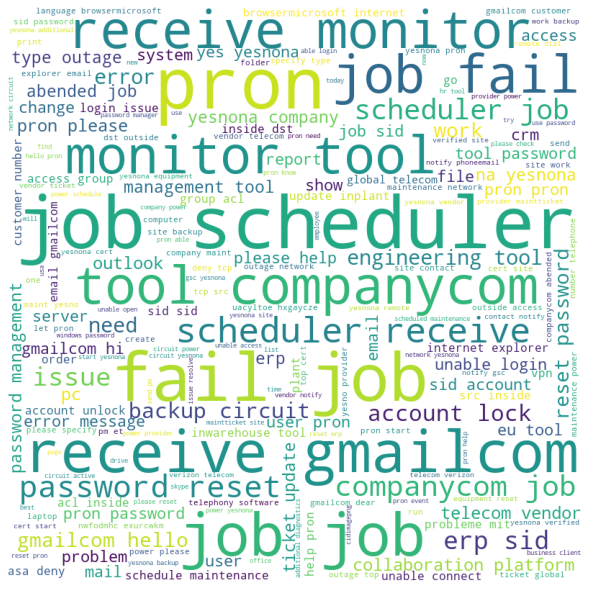

In [172]:
import matplotlib.pyplot as plt

wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Implementing Models**

In [173]:
embedding_size= 60
window_size= 40
min_word= 5
down_sampling= 1e-2

In [174]:
from gensim.models.fasttext import FastText

**Words variable contains all the text in Combined Description**

In [175]:
Words

'login issue verify user detail employee manager name check the user name in ad and reset the password advise the user to login and check caller confirm that -pron- be able to login issue resolve outlook receive from gmailcom hello team -pron- meetingsskype meeting etc be not appear in -pron- outlook calendar can somebody please advise how to correct this kind can not log in to vpn receive from gmailcom hi i can not log on to vpn best unable to access hr tool page unable to access hr tool page skype error skype error unable to log in to engineering tool and skype unable to log in to engineering tool and skype ticket no employment status new non employee enter user name ticket no employment status new non employee enter user name unable to disable add in on outlook unable to disable add in on outlook ticket update on inplant ticket update on inplant engineering tool say not connect and unable to submit report engineering tool say not connect and unable to submit report hr tool site not 

In [176]:
import nltk
from nltk import WordPunctTokenizer
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(Words)]

In [177]:
word_tokenized_corpus

[['login',
  'issue',
  'verify',
  'user',
  'detail',
  'employee',
  'manager',
  'name',
  'check',
  'the',
  'user',
  'name',
  'in',
  'ad',
  'and',
  'reset',
  'the',
  'password',
  'advise',
  'the',
  'user',
  'to',
  'login',
  'and',
  'check',
  'caller',
  'confirm',
  'that',
  '-',
  'pron',
  '-',
  'be',
  'able',
  'to',
  'login',
  'issue',
  'resolve',
  'outlook',
  'receive',
  'from',
  'gmailcom',
  'hello',
  'team',
  '-',
  'pron',
  '-',
  'meetingsskype',
  'meeting',
  'etc',
  'be',
  'not',
  'appear',
  'in',
  '-',
  'pron',
  '-',
  'outlook',
  'calendar',
  'can',
  'somebody',
  'please',
  'advise',
  'how',
  'to',
  'correct',
  'this',
  'kind',
  'can',
  'not',
  'log',
  'in',
  'to',
  'vpn',
  'receive',
  'from',
  'gmailcom',
  'hi',
  'i',
  'can',
  'not',
  'log',
  'on',
  'to',
  'vpn',
  'best',
  'unable',
  'to',
  'access',
  'hr',
  'tool',
  'page',
  'unable',
  'to',
  'access',
  'hr',
  'tool',
  'page',
  'skype',


**FastText for Semantic Analysis**

In [178]:
%%time
ft_model = FastText(word_tokenized_corpus,
                     size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                     sg=1,
                      iter=100)
 # sg means type of mode.sg=1 skip gram model

CPU times: user 1min 37s, sys: 266 ms, total: 1min 37s
Wall time: 1min 37s


In [179]:
print(ft_model.wv['account'])

[ 0.06732311  0.39747003 -0.25659102 -0.55682266 -0.6669625  -0.39009753
 -0.4045413   0.30780986 -0.38643098  0.48020628  0.15871073 -0.14180422
 -0.14653589  0.7755066  -0.1660606   0.0226805  -0.3000469   0.05812829
 -0.69627213 -0.3553378  -0.07047791  0.5881164  -0.3800086  -0.553343
  0.5349576  -0.20328072 -0.21580239  0.06824571 -0.11980865  0.61948735
  0.5476857   0.33830926  0.26260486 -0.48366672  0.5310691   0.1231534
 -0.09681126 -0.41817948  0.12042761  0.04564703  0.7314633   0.48094657
 -0.02136874  0.21579376  0.3983327   0.02715678  0.21364497 -0.08782901
 -0.2742116  -0.5544909   0.2963684  -0.05881602  0.5063824   0.38608086
 -0.11003409 -0.0783267   0.16496657 -0.39758724 -0.05265206  0.06964032]


In [180]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['account', 'login', 'password', 'reset', 'ticket', 'install']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

account:['lock', 'accout', 'count', 'sid', 'samaccountname']
login:['logic', 'to', 'verified', 'logistics', 'detailed']
password:['reset', 'passwords', 'to', 'for', 'erp']
reset:['password', 'sid', 'erp', 'passwords', 'erpgui']
ticket:['update', 'inplant', 'maintticket', 'ticketing', 'packet']
install:['uninstalle', 'instandsetzung', 'reinstall', 'instead', 'outbound']


In [181]:
print(ft_model.wv.similarity(w1='login', w2='password'))

0.7139913


In [182]:
print(ft_model.wv.similarity(w1='login', w2='schedule'))

0.5039709


In [183]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['account', 'lock', 'accout', 'count', 'sid', 'samaccountname', 'login', 'logic', 'to', 'verified', 'logistics', 'detailed', 'password', 'reset', 'passwords', 'to', 'for', 'erp', 'reset', 'password', 'sid', 'erp', 'passwords', 'erpgui', 'ticket', 'update', 'inplant', 'maintticket', 'ticketing', 'packet', 'install', 'uninstalle', 'instandsetzung', 'reinstall', 'instead', 'outbound']
<class 'list'>
36


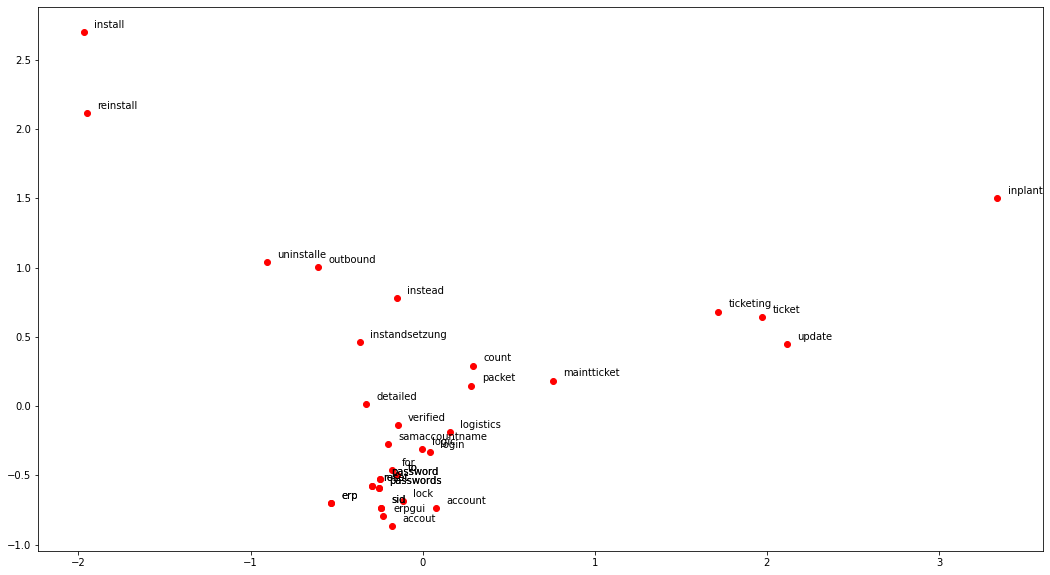

In [184]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

**The words those have simillar meaning or related are neighbours and words those are not related or have opposite meaning, have more distance between them.**

## PART 2 - <br> Model Building

---

* Building a model architecture which can classify. <br>
* Trying different model architectures by researching state of the art for similar tasks.  <br>
* Train the model  <br>
* To deal with large training time, save the weights so that you can use them when training the 
model for the second time without starting from scratch  <br>

**FastText Model Building and Finding Precison and Recall**

In [185]:
!pip install fasttext

In [186]:
!wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip

--2021-06-09 06:00:28--  https://github.com/facebookresearch/fastText/archive/v0.1.0.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0 [following]
--2021-06-09 06:00:28--  https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.1.0.zip’

v0.1.0.zip              [ <=>                ]  92.06K  --.-KB/s    in 0.02s   

2021-06-09 06:00:29 (4.30 MB/s) - ‘v0.1.0.zip’ saved [94267]



In [187]:
!unzip v0.1.0.zip

Archive:  v0.1.0.zip
431c9e2a9b5149369cc60fb9f5beba58dcf8ca17
   creating: fastText-0.1.0/
  inflating: fastText-0.1.0/.gitignore  
  inflating: fastText-0.1.0/CONTRIBUTING.md  
  inflating: fastText-0.1.0/LICENSE  
  inflating: fastText-0.1.0/Makefile  
  inflating: fastText-0.1.0/PATENTS  
  inflating: fastText-0.1.0/README.md  
  inflating: fastText-0.1.0/classification-example.sh  
  inflating: fastText-0.1.0/classification-results.sh  
  inflating: fastText-0.1.0/eval.py  
  inflating: fastText-0.1.0/get-wikimedia.sh  
  inflating: fastText-0.1.0/pretrained-vectors.md  
  inflating: fastText-0.1.0/quantization-example.sh  
  inflating: fastText-0.1.0/quantization-results.sh  
   creating: fastText-0.1.0/src/
  inflating: fastText-0.1.0/src/args.cc  
  inflating: fastText-0.1.0/src/args.h  
  inflating: fastText-0.1.0/src/dictionary.cc  
  inflating: fastText-0.1.0/src/dictionary.h  
  inflating: fastText-0.1.0/src/fasttext.cc  
  inflating: fastText-0.1.0/src/fasttext.h  
  inflat

In [188]:
%cd fastText-0.1.0
!make

/content/fastText-0.1.0/fastText-0.1.0
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o dictionary.o productquantizer.o matrix.o qmatrix.o vector.o model.o utils.o fasttext.o src/main.cc -o fasttext


In [189]:
!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [190]:
df_copy_Refined_Data.shape

(8408, 12)

In [191]:
from io import StringIO
import csv

col = ['Assignment group', 'Combined Description']
df_copy_FastText=df_copy_Refined_Data[col]
df_copy_FastText['Assignment group']=['__label__'+ s for s in df_copy_Refined_Data['Assignment group']]

df_copy_FastText.to_csv(r'/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
!head -n 7000 "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated.txt" > "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated_train.txt"
!tail -n 1408  "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated.txt" > "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated_test.txt"

In [193]:
%%time
!./fasttext supervised -input "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated.txt" -output model_Automatic_Ticket_System

Read 0M words
Number of words:  13110
Number of labels: 74
Progress: 100.0%  words/sec/thread: 1057806  lr: 0.000000  loss: 2.084730  eta: 0h0m 
CPU times: user 27 ms, sys: 22 ms, total: 49 ms
Wall time: 1.64 s


In [194]:
!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


In [195]:
# model_Automatic_Ticket_System.bin 
!./fasttext test model_Automatic_Ticket_System.bin "/content/drive/MyDrive/AL ML GreatLearning/CapstoneProjectGL/Saurav/AutomaticTicketSystem_updated_test.txt"

N	1408
P@1	0.577
R@1	0.577
Number of examples: 1408


In [196]:
!ls

args.o				   model.o
classification-example.sh	   PATENTS
classification-results.sh	   pretrained-vectors.md
CONTRIBUTING.md			   productquantizer.o
dictionary.o			   qmatrix.o
eval.py				   quantization-example.sh
fasttext			   quantization-results.sh
fasttext.o			   README.md
get-wikimedia.sh		   src
LICENSE				   tutorials
Makefile			   utils.o
matrix.o			   vector.o
model_Automatic_Ticket_System.bin  wikifil.pl
model_Automatic_Ticket_System.vec  word-vector-example.sh


**Precision and Recall of 57% is coming.**

In next milestone we will do the model tuning by running epochs and testing on top 50 or top 10 groups.

## PART 3 - <br> Test the Model, Fine-tuning and Repeat

---

* Test the model and report as per evaluation metrics
* Try different models
* Try different evaluation metrics 
* Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning 
rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
* Report evaluation metrics for these models along with your observation on how changing 
different hyper parameters leads to change in the final evaluation metric.